# Introduction
* An earthquake (also known as a quake , tremor or temblor ) is the shaking of the surface of the Earth, resulting from the sudden release of energy in the Earth 's lithosphere that creates seismic waves . (Wiki)
* Animation with Plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter   
import datetime as dt
import sklearn as sk
from sklearn import linear_model

# Read the data
df = pd.read_csv('../csv/database_earthquakes.csv')

# columns are ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
#    'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
#    'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
#    'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
#    'Source', 'Location Source', 'Magnitude Source', 'Status']
# We will use only the following columns:
# 'Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status'
# df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']]



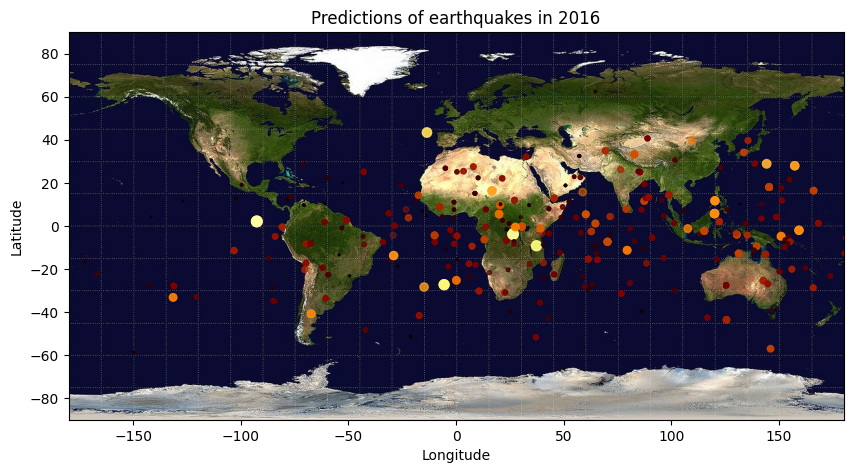

In [25]:

df = pd.read_csv('earthquakes_predicted.csv')
df['Month'] = df['Date'].astype('string').str[5:7].astype('float')
df['Year'] = df['Date'].astype('string').str[0:4].astype('float')
df['Day'] = df['Date'].astype('string').str[8:10].astype('float')
df['Date'] = pd.to_datetime(df['Date'])

df1 = df[df['Date'] > "2015-06-01"].copy()
# create a figure
fig = plt.figure(figsize=(10,10))
# create a subplot
ax = fig.add_subplot(111)
# set the title
ax.set_title('Predictions of earthquakes in 2016')
# set the x and y labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# set the x and y limits
ax.set_xlim(-180,180)
ax.set_ylim(-90,90)
# set the background image of the plot
ax.imshow(plt.imread('eq.jpg'), extent=[-180,180,-90,90])
# create a scatter plot of the earthquakes
sc = ax.scatter(df['Longitude'], df['Latitude'], s=(df["Magnitude"]**5/df["Magnitude"].min()**3)+1-df['Magnitude'].min()**2, 
                c=df['Magnitude'], alpha=1-abs(df['Depth']/(df['Depth'].max())), cmap='afmhot')
plt.show()


In [5]:
df = pd.read_csv('earthquakes_predicted.csv')
df['Month'] = df['Date'].astype('string').str[5:7].astype('float')
df['Year'] = df['Date'].astype('string').str[0:4].astype('float')
df['Day'] = df['Date'].astype('string').str[8:10].astype('float')
df['Date'] = pd.to_datetime(df['Date'])

df1 = df[df['Date'] > "2015-06-01"].copy()

df = pd.read_csv('../csv/database_earthquakes.csv')
df['Month'] = df['Date'].astype('string').str[0:2].astype('float')
df['Year'] = df['Date'].astype('string').str[6:10].astype('float')
df['Day'] = df['Date'].astype('string').str[3:5].astype('float')
df['Date'] = pd.to_datetime(df['Date'])

df2 = df[df['Date'] > "2015-06-01"].copy()


In [24]:

def animate(i):
    ax.clear()
    ax.set_title('Predictions of earthquakes in 2016\n' + str(2015+(i+6)//12) + '-' + str(1+(i+6)%12).zfill(2))
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_xlim(-180,180)
    ax.set_ylim(-90,90)
    ax.imshow(plt.imread('eq.jpg'), extent=[-180,180,-90,90])
    df_year = df1[(df1['Year'] == 2015+(i+6)//12) & (df1['Month'] == 1+(i+6)%12)].copy()
    df_year['cmap'] = 'winter'
    df_year2 = df2[(df2['Year'] == 2015+(i+6)//12) & (df2['Month'] == 1+(i+6)%12)].copy()
    df_year2['cmap'] = 'afmhot'
    
    if not df_year.empty:
        sc = ax.scatter(df_year['Longitude'], df_year['Latitude'], s=(df_year["Magnitude"]**5/df_year["Magnitude"].min()**3)+1-df_year['Magnitude'].min()**2, 
                        c=df_year['Magnitude'], alpha=1-abs(df_year['Depth']/(df_year['Depth'].max())), cmap="winter")
    if not df_year2.empty:
        sc = ax.scatter(df_year2['Longitude'], df_year2['Latitude'], s=(df_year2["Magnitude"]**5/df_year2["Magnitude"].min()**3)+1-df_year2['Magnitude'].min()**2, 
                        c=df_year2['Magnitude'], alpha=1-abs(df_year2['Depth']/(df_year2['Depth'].max())), cmap="afmhot")

    return sc
# create the animation

anim = animation.FuncAnimation(fig, animate, frames=18, interval=100, blit=False)

print('saving the animation...')
anim.save('earthquakes_pred.gif', writer='pillow', fps=1)

# show the animation
plt.show()

saving the animation...
